In [1]:
import os
os.environ['SCI_ENG_DIR']="/Users/ealei/Coding/Sci-Eng-Interface/hwo_sci_eng"
os.environ['YIP_CORO_DIR']="/Users/ealei/Coding/yips"



Observatory Configuration:
  Using preset: ToyModel

Calculating optics throughput from preset...
Calculating epswarmTrcold as 1 - optics throughput...
Baseline exposure time: [3.7535542] h
Observatory Configuration:
  Using preset: ToyModel

Calculating optics throughput from preset...
Calculating epswarmTrcold as 1 - optics throughput...
Observatory Configuration:
  Using preset: ToyModel

Calculating optics throughput from preset...
Calculating epswarmTrcold as 1 - optics throughput...
Observatory Configuration:
  Using preset: ToyModel

Calculating optics throughput from preset...
Calculating epswarmTrcold as 1 - optics throughput...
Observatory Configuration:
  Using preset: ToyModel

Calculating optics throughput from preset...
Calculating epswarmTrcold as 1 - optics throughput...
Observatory Configuration:
  Using preset: ToyModel

Calculating optics throughput from preset...
Calculating epswarmTrcold as 1 - optics throughput...
Observatory Configuration:
  Using preset: ToyMode

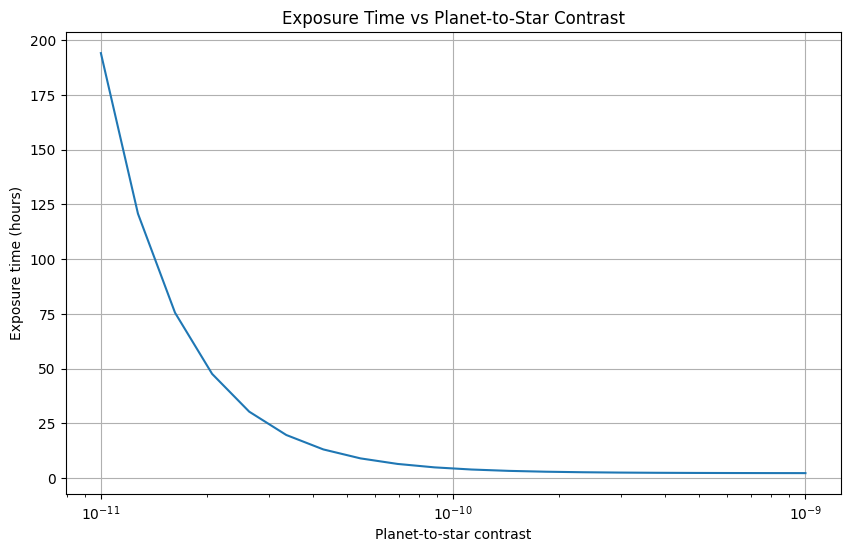

Observatory Configuration:
  Using preset: ToyModel

Calculating optics throughput from preset...
Calculating epswarmTrcold as 1 - optics throughput...
Observatory Configuration:
  Using preset: ToyModel

Calculating optics throughput from preset...
Calculating epswarmTrcold as 1 - optics throughput...
Observatory Configuration:
  Using preset: ToyModel

Calculating optics throughput from preset...
Calculating epswarmTrcold as 1 - optics throughput...
Observatory Configuration:
  Using preset: ToyModel

Calculating optics throughput from preset...
Calculating epswarmTrcold as 1 - optics throughput...
Observatory Configuration:
  Using preset: ToyModel

Calculating optics throughput from preset...
Calculating epswarmTrcold as 1 - optics throughput...
Observatory Configuration:
  Using preset: ToyModel

Calculating optics throughput from preset...
Calculating epswarmTrcold as 1 - optics throughput...
Observatory Configuration:
  Using preset: ToyModel

Calculating optics throughput from 

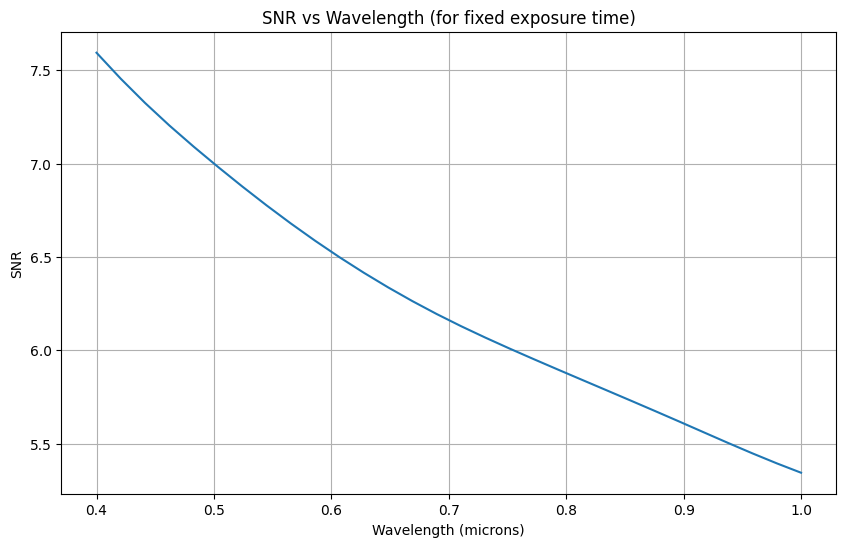

Observatory Configuration:
  Using preset: ToyModel

Calculating optics throughput from preset...
Calculating epswarmTrcold as 1 - optics throughput...
Observatory Configuration:
  Using preset: ToyModel

Calculating optics throughput from preset...
Calculating epswarmTrcold as 1 - optics throughput...
Observatory Configuration:
  Using preset: ToyModel

Calculating optics throughput from preset...
Calculating epswarmTrcold as 1 - optics throughput...
Observatory Configuration:
  Using preset: ToyModel

Calculating optics throughput from preset...
Calculating epswarmTrcold as 1 - optics throughput...
Observatory Configuration:
  Using preset: ToyModel

Calculating optics throughput from preset...
Calculating epswarmTrcold as 1 - optics throughput...
Observatory Configuration:
  Using preset: ToyModel

Calculating optics throughput from preset...
Calculating epswarmTrcold as 1 - optics throughput...
Observatory Configuration:
  Using preset: ToyModel

Calculating optics throughput from 

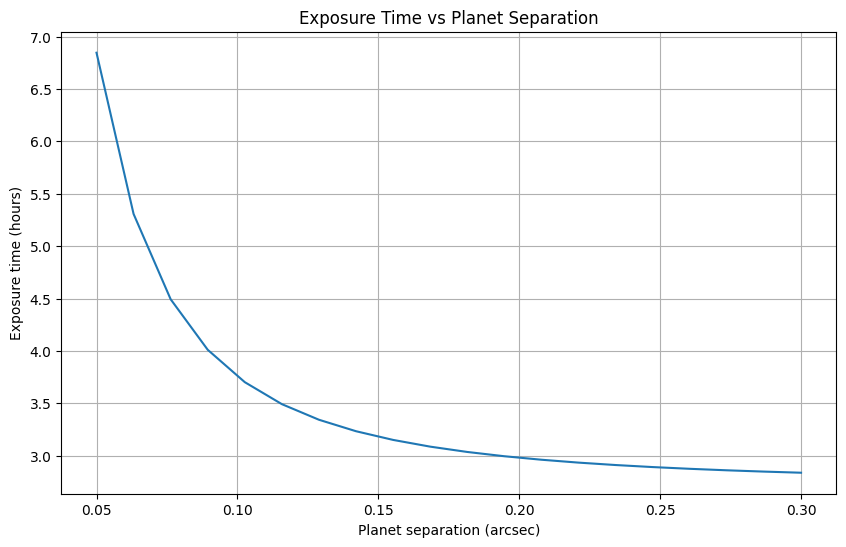

In [1]:
# Coronagraph Exposure Time Calculator: Earth-like Planet Detection

import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
from pyEDITH import calculate_texp, calculate_snr

# Import other necessary functions from your existing code

## 1. Introduction
# Brief explanation of the purpose of this notebook

## 2. Set up the baseline scenario
# Define the parameters for an Earth-like planet around a Sun-like star at 10 pc

parameters = {'lambd': [0.5],
 'resolution': [5],
 'snr': [7],
 'photap_rad': 0.85,
 'CRb_multiplier': 2.0,
 'Lstar': 1,
 'distance': 10,
 'angdiam': 0.01,
 'nzodis': 3.0,
 'ra': 236.00757736823,
 'dec': 2.51516683165,
 'sp': 0.1,
 'Fp_min/Fs': 1e-10,
 'observatory_preset': 'ToyModel',
 'observing_mode': 'IMAGER',
 'bandwidth': 0.2,
 'FstarV_10pc': np.float64(120.56016122010257),
 'Fstar_10pc': [np.float64(115.55398320922559)],
 'Fp/Fs': [np.float64(1.216499285714286e-10)]}

used_parameters=parameters.copy()
## 3. Calculate baseline exposure time
baseline_texp, _ = calculate_texp(used_parameters, verbose=False)
print(f"Baseline exposure time: {baseline_texp.to(u.hr)}")

## 4. Practical Example: Varying planet-to-star contrast

contrasts = np.logspace(-11, -9, 20)
exposure_times = []

used_parameters=parameters.copy()

for contrast in contrasts:
    used_parameters['Fp/Fs'] = [contrast]
    texp, _ = calculate_texp(used_parameters, verbose=False)
    exposure_times.append(texp.to(u.hr).value)

plt.figure(figsize=(10, 6))
plt.semilogx(contrasts, exposure_times)
plt.xlabel('Planet-to-star contrast')
plt.ylabel('Exposure time (hours)')
plt.title('Exposure Time vs Planet-to-Star Contrast')
plt.grid(True)
plt.show()

## 5. Sensitivity Analysis: Wavelength dependence

wavelengths = np.linspace(0.4, 1.0, 30)
snrs = []

used_parameters=parameters.copy()

for wavelength in wavelengths:
    used_parameters['lambd'] = [wavelength]
    snr,_ = calculate_snr(used_parameters, baseline_texp, verbose=False)
    snrs.append(snr)

plt.figure(figsize=(10, 6))
plt.plot(wavelengths, snrs)
plt.xlabel('Wavelength (microns)')
plt.ylabel('SNR')
plt.title('SNR vs Wavelength (for fixed exposure time)')
plt.grid(True)
plt.show()

## 6. Sensitivity Analysis: Planet separation

separations = np.linspace(0.05, 0.3, 20)
exposure_times = []

used_parameters=parameters.copy()

for separation in separations:
    used_parameters['sp'] = separation
    texp, _ = calculate_texp(used_parameters, verbose=False)
    exposure_times.append(texp.to(u.hr).value)

plt.figure(figsize=(10, 6))
plt.plot(separations, exposure_times)
plt.xlabel('Planet separation (arcsec)')
plt.ylabel('Exposure time (hours)')
plt.title('Exposure Time vs Planet Separation')
plt.grid(True)
plt.show()

## 7. Conclusion
# Summary of findings and implications for observing Earth-like planets

In [ ]:
import numpy as np
import astropy.units as u
import astropy.constants as const
import matplotlib.pyplot as plt
import os

from pyEDITH.astrophysical_scene import calc_flux_zero_point
from pyEDITH import calculate_texp,calculate_snr
from pyEDITH.units import *
import pandas as pd

def calculate_deltalambda_edges(lam,bandwidth, resolution):
    deltalambda= (
        np.min(
            [
                lam / resolution,
                bandwidth  * lam,
            ]
        )
    )
    lam_min=lam-deltalambda/2
    lam_max=lam+deltalambda/2
    return lam_min, lam_max, deltalambda


def calculate_flux(cfg_file, rad_file):
    run_psg_docker(cfg_file, rad_file)
    data = np.loadtxt(rad_file, comments='#')
    return data


def find_average_fluxes(wave, flux,edges):
    
    # find edges of bin over which to average result
    lam_min_idx = np.argmin(np.abs(wave - edges[0]))
    lam_max_idx = np.argmin(np.abs(wave - edges[1]))
    edges_idx = [lam_min_idx,lam_max_idx]

    #average flux over bandpass
    return np.mean(flux[lam_min_idx:lam_max_idx])
    

In [1]:
parameters = {
# Observation
 'lambd': [0.5], # micron
 'resolution': [5],
 'snr': [7],
 'photap_rad': 0.85,
  'CRb_multiplier': 2.0,
# Astrophysical Scene
"Lstar" : 1, #Lsun
"distance": 10, #pc
'angdiam': 0.01,
'nzodis': 3.0,
'ra': 236.00757736823,
 'dec': 2.51516683165,
  'sp': 0.1, #CHECK
"Fp_min/Fs":1e-10,
# Observatory Specs
 'observatory_preset': 'ToyModel',
 'observing_mode': 'IMAGER',
 'bandwidth':0.2,
}
secondary_parameters={}
#replicate secondary parameters when not available
for key in parameters:
                if key not in secondary_parameters:
                    secondary_parameters[key] = parameters[key]

In [ ]:
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
import pickle


Crp_list=[]
cfg='Earth_at_quadrature/TEMPLATE.txt'
rad = 'Earth_at_quadrature/psg_rad_Wm2um.txt'
flux = calculate_flux(cfg, rad)
stellar_flux=flux[:,2] * u.W/u.m**2/u.um
stellar_flux=stellar_flux.to(u.photon / (u.cm**2 * u.s * u.nm),equivalencies = u.spectral_density(flux[:,0]*u.micron))
cfg='Earth_at_quadrature/TEMPLATE_contrast.txt'
rad = 'Earth_at_quadrature/psg_rad_rel.txt'
contrast = calculate_flux(cfg, rad)
planet_flux=contrast[:,-1]

#### DISCOVERY DETERMINES THE EXPOSURE TIME == SNR 7 at 0.5 micron at 20% bandpass
band=0.2
parameters['bandwidth']=band

#calculate magnitudes at V band
lam_min,lam_max,_ = calculate_deltalambda_edges(0.55,band, parameters['resolution'][0])
parameters['FstarV']=find_average_fluxes(flux[:,0], stellar_flux,[lam_min,lam_max]).value

# calculate magnitudes at 0.5 micron
lam_min_primary,lam_max_primary,deltalambda_primary = calculate_deltalambda_edges(parameters['lambd'][0],band, parameters['resolution'][0])
parameters['Fstar']=[find_average_fluxes(flux[:,0], stellar_flux,[lam_min_primary,lam_max_primary]).value]
parameters['Fp/Fs'] = [find_average_fluxes(contrast[:,0], planet_flux,[lam_min_primary,lam_max_primary])]


ax1.errorbar(parameters['lambd'][0],parameters['Fstar'][0],xerr=deltalambda_primary/2,color='red')
ax2.errorbar(parameters['lambd'][0],parameters['Fp/Fs'][0],xerr=deltalambda_primary/2,color='red')
    
# print("Calculating texp from primary lambda")
texp, _ = calculate_texp(parameters,verbose=False)
print("Reference exposure time: ", texp.to(u.hr))


observed_earth_bandpasses={}
for band in [0.05,0.1,0.2]:
    #open figure and plot fluxes
    fig, axs = plt.subplots(2, 2, figsize=(12, 8),sharex=True)
    fig.suptitle('BANDPASS '+str(band))

    ax1, ax2, ax3, ax4 = axs.flatten()
    ax1.set_xlim(0,2)
    ax1.set_title('Stellar spectrum (Wm2um)')
    ax2.set_title('Planet spectrum (Fp/Fs)')
    ax1.plot(flux[:,0],stellar_flux,c='gray')
    ax2.plot(contrast[:,0],planet_flux,c='gray')


    secondary_parameters['bandwidth']=band
    observed_earth=pd.DataFrame(columns=['wavelength','flux','error','snr'])

    data_list=[]

    for lam in np.linspace(0.3,1.75,50):
        
        secondary_parameters['lambd']=[lam] # save secondary lambda
        secondary_parameters['FstarV']=parameters['FstarV']
        #Calculate magnitudes for ETC calculation
        lam_min_secondary,lam_max_secondary,deltalambda_secondary = calculate_deltalambda_edges(lam,band, parameters['resolution'][0])
        secondary_parameters['Fstar']=[find_average_fluxes(flux[:,0], stellar_flux,[lam_min_secondary,lam_max_secondary]).value]
        secondary_parameters['Fp/Fs'] = [find_average_fluxes(contrast[:,0], planet_flux,[lam_min_secondary,lam_max_secondary])]
        
        ax1.scatter(lam,secondary_parameters['Fstar'][0],color='green',alpha=0.3)
        ax2.scatter(lam,secondary_parameters['Fp/Fs'][0],color='blue',alpha=0.3)

        ax1.errorbar(lam,secondary_parameters['Fstar'][0],xerr=deltalambda_secondary/2,color='green',alpha=0.3)
        ax2.errorbar(lam,secondary_parameters['Fp/Fs'][0],xerr=deltalambda_secondary/2,color='blue',alpha=0.3)


        snr,_ = calculate_snr(secondary_parameters, texp,verbose=True)

        observed_earth.loc[len(observed_earth)] = [lam,secondary_parameters['Fp/Fs'][0],secondary_parameters['Fp/Fs'][0]/snr[0],snr[0]]
        with open('photon_counts.pk', 'rb') as file:
                data = pickle.load(file)
        data = {k: v[0] if isinstance(v, np.ndarray) and v.size == 1 else v 
                            for k, v in data.items()}
        data['wavelength'] = lam  
        data_list.append(data)


    observed_earth['wavelength'] = pd.to_numeric(observed_earth['wavelength'], errors='coerce')
    observed_earth['flux'] = pd.to_numeric(observed_earth['flux'], errors='coerce')
    observed_earth['error'] = pd.to_numeric(observed_earth['error'], errors='coerce')
    observed_earth_bandpasses[band]=observed_earth

    ax3.set_title('Observed Spectrum')
    ax3.errorbar((observed_earth.wavelength),np.array(observed_earth.flux),yerr=np.array(observed_earth.error),marker='o')
    ax3.set_ylabel('Observed Fp/Fs')
    ax3.set_xlabel('wlen (micron)')
    ax3.set_ylim(0,3e-10)
    ax4.set_title('SNR')
    ax4.scatter(np.array(observed_earth.wavelength),np.array(observed_earth.snr),marker='o')
    ax4.set_ylabel('SNR')
    ax4.set_xlabel('wlen (micron)')

               

    # Create DataFrame
    df = pd.DataFrame(data_list)

    # Set filename as index
    df.set_index('wavelength', inplace=True)

    # Get numeric columns
    numeric_df = df.select_dtypes(include=[np.number])

    # Create the plot
    plt.figure(figsize=(12, 8))
    plt.title('BANDPASS '+str(band))
    for column in numeric_df.columns:
        plt.semilogy(numeric_df.index, numeric_df[column],  label=column)

    # plt.title('All Numeric Columns Across Files')
    plt.xlabel('Wavelength')
    plt.ylabel('Count Rates')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.ylim(1e-8,1e2)
    # plt.savefig(output_file, dpi=300, bbox_inches='tight')
    # plt.close()

    Crp_list.append(df['CRp'])
    
Crp=pd.DataFrame(Crp_list)
Crp=Crp.T
Crp.columns=['0.05','0.1','0.2']
plt.figure(figsize=(12, 8))
for column in Crp.columns:
    plt.plot(Crp.index, Crp[column],  marker='o',label=column)
plt.legend()

Crp['0.05']/Crp['0.1']

plt.figure(figsize=(12, 8))
plt.plot(Crp.index,Crp['0.1']/Crp['0.05'],marker='o',label='0.1/0.05')
plt.plot(Crp.index,Crp['0.2']/Crp['0.05'],marker='o',label='0.2/0.05')
plt.legend()
plt.ylim(0,10)